In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('football_transfers_2021.csv', skip_blank_lines=True)

In [3]:
df

,player_name,position,age,team_origin,country_origin,league_origin,team_dest,country_dest,league_dest,transfer_fee,date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


## Rename columns of dataframe

In [4]:
df = df.rename(columns={
                "player_name":"Player", 
                "position":"Position",
                "age":"Age",
                "team_origin":"Team Origin",
                "country_origin":"Country Origin",
                "league_origin":"League Origin",
                "team_dest":"Team Destination",
                "country_dest":"Country Destination",
                "league_dest":"League Destination",
                "transfer_fee":"Transfer Fee (€)",
                "date":"Date"})

In [5]:
df

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


In [6]:
df.columns

Index(['Player', 'Position', 'Age', 'Team Origin', 'Country Origin',
       'League Origin', 'Team Destination', 'Country Destination',
       'League Destination', 'Transfer Fee (€)', 'Date'],
      dtype='object')

In [7]:
df.dtypes

Player                  object
Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [8]:
## Data cleaning
## Look at Null Values in DataFrame

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),2)
    print('{}-{}%'.format(col, pct_missing))

Player-0.0%
Position-0.0%
Age-0.0%
Team Origin-0.0%
Country Origin-0.08%
League Origin-0.08%
Team Destination-0.0%
Country Destination-0.15%
League Destination-0.15%
Transfer Fee (€)-0.0%
Date-0.0%


In [9]:
# Remove all null values
df = df.dropna()

In [10]:
## Set index to player

df = df.set_index('Player')

In [11]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,loan transfer,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [12]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [13]:
## change the data type in column Transfer Fee

df['Transfer Fee (€)'].unique

<bound method Series.unique of Player
Dominik Szoboszlai          €22.00m
Filip Stevanovic             €8.50m
Brenden Aaronson             €5.45m
Víctor Dávila                €4.50m
Carlos González              €4.48m
                          ...      
Raffaele Scuderi      loan transfer
Emiliano Tortolano                ?
Dylan Kambo                       ?
Reginaldo                         -
Marcão                            -
Name: Transfer Fee (€), Length: 50531, dtype: object>

In [14]:
df.loc[df['Transfer Fee (€)']=='loan transfer', 'Transfer Fee (€)'] = 0

In [15]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [16]:
df.loc[df['Transfer Fee (€)']=='?', 'Transfer Fee (€)'] = 0

In [17]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [18]:
 df.loc[df['Transfer Fee (€)']=='draft', 'Transfer Fee (€)'] = 0

In [19]:
df.loc[df['Transfer Fee (€)']=='-', 'Transfer Fee (€)'] = 0

In [20]:
df.loc[df['Transfer Fee (€)']=='free transfer', 'Transfer Fee (€)'] = 0

In [21]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [22]:
df.loc[df['Transfer Fee (€)'].str.contains('Loan fee', na=False)] = 0 

In [23]:
df['Transfer Fee (€)'].value_counts()

0           48863
€500Th.        74
€1.00m         71
€2.00m         54
€200Th.        54
            ...  
€3.31m          1
€274Th.         1
€113.00m        1
€3.10m          1
€4.55m          1
Name: Transfer Fee (€), Length: 419, dtype: int64

In [24]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [25]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [26]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('€', ' ')

In [27]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [28]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [29]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace(',', '.')


In [30]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [31]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [32]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


<ipython-input-32-bb3a891e0298>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


In [33]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [34]:
df['Transfer Fee (€)']=df['Transfer Fee (€)'].replace({"Th":"*1e3", "m":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [35]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [36]:
df['Age'] = df['Age'].astype('int32')

### Add a month column


In [37]:
#Verify if we have NaN in our dataframe:

nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01


In [38]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


In [39]:
# Change all  values to NaN
df.replace(0, np.nan, inplace=True)


In [40]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Lucas Passerini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damián Batallini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lennart Moser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [41]:
df = df.dropna(how='all')


In [42]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
Behrang Safari,Left-Back,35.0,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,NaN,2021-01-01
Ariel Cólzera,Second Striker,34.0,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,NaN,2021-01-01
Robbie Weir,Central Midfield,32.0,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,NaN,2021-01-01


In [43]:
# Change NaN to 0 in Transfer Fee 
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].replace(np.nan, 0)

In [44]:
#It should be blank dataframe due to lack of 0 values in Transfer Fee
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


In [45]:
df['Month'] = df['Date'].str[5:7]
df['Month'] = df['Month'].astype('int')
df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1


In [46]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0.0,2021-12-31,12
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0.0,2021-12-31,12
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0.0,2021-12-31,12


In [47]:
#Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convert Age and Transfer Fee (€) to int

df['Age']=df['Age'].astype("int32")
df['Transfer Fee (€)'] =  df['Transfer Fee (€)'].astype("int32")

In [48]:
df.dtypes

Position                       object
Age                             int32
Team Origin                    object
Country Origin                 object
League Origin                  object
Team Destination               object
Country Destination            object
League Destination             object
Transfer Fee (€)                int32
Date                   datetime64[ns]
Month                           int32
dtype: object

In [49]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


Basic information about dataframe after cleaning

In [50]:
df.info(), df.size, df.shape, df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 50267 entries, Dominik Szoboszlai to Marcão
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Position             50267 non-null  object        
 1   Age                  50267 non-null  int32         
 2   Team Origin          50267 non-null  object        
 3   Country Origin       50267 non-null  object        
 4   League Origin        50267 non-null  object        
 5   Team Destination     50267 non-null  object        
 6   Country Destination  50267 non-null  object        
 7   League Destination   50267 non-null  object        
 8   Transfer Fee (€)     50267 non-null  int32         
 9   Date                 50267 non-null  datetime64[ns]
 10  Month                50267 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 4.0+ MB


(None,
 552937,
 (50267, 11),
 object            7
 int32             3
 datetime64[ns]    1
 dtype: int64)

## Counting the quantity of transfer in 2021

In [51]:
df_reset_index = df.reset_index()

In [52]:
df_reset_index 

,Player,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50262,Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
50263,Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
50264,Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12
50265,Reginaldo,Centre-Back,29,CRB,Brazil,Série B,Fluminense,Brazil,Série A,0,2021-12-31,12


In [53]:
CountingTransfersperMonth = df_reset_index.groupby(['Month'])['Player'].count()

In [54]:
CountingTransfersperMonth.to_frame()

,Player
Month,
1,7854
2,5215
3,2570
4,1728
5,593
6,646
7,17666
8,8399
9,2957


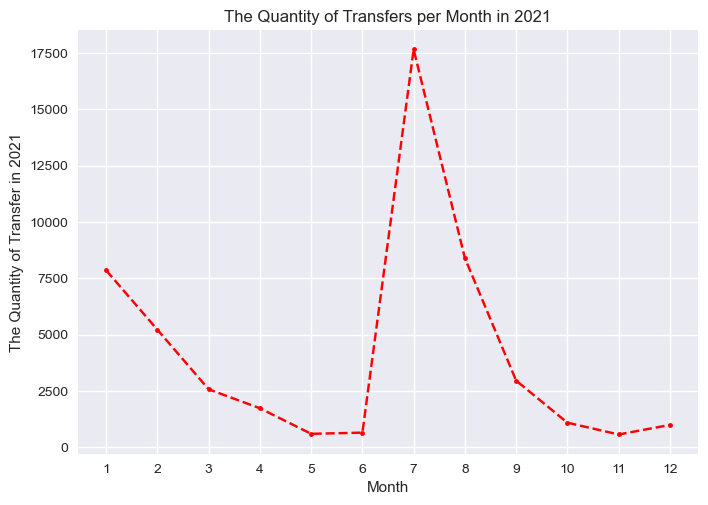

<Figure size 100x100 with 0 Axes>

In [198]:
## change the font of label and title

plt.plot(CountingTransfersperMonth, 'r.--')


plt.title('The Quantity of Transfers per Month in 2021')
plt.ylabel('The Quantity of Transfer in 2021')

plt.xlabel('Month')

plt.gca().set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.figure(figsize=(1,1))


plt.show()

## The classification of Players by age

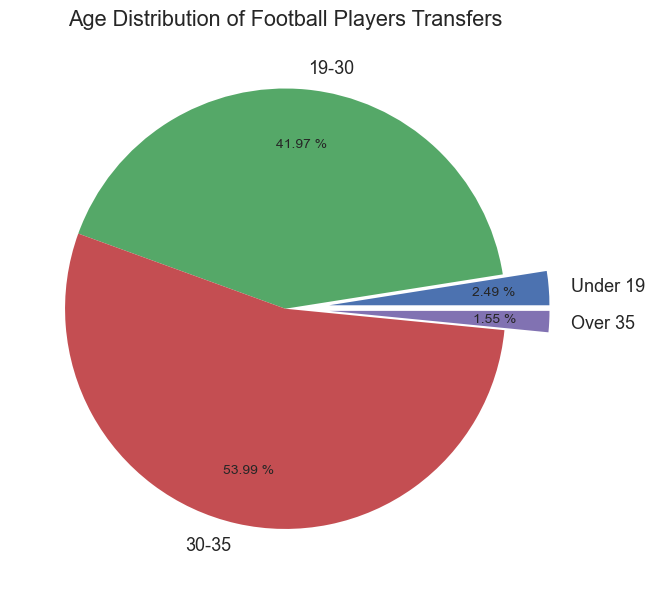

<Figure size 100x100 with 0 Axes>

In [216]:
## ## change the font of label and title

plt.style.use('seaborn-talk')

Teenager = df_reset_index.loc[df_reset_index['Age'] < 19].count()[0]
Youth = df_reset_index.loc[(df_reset_index['Age'] >= 19) & (df_reset_index['Age'] < 30) ].count()[0]
Adults = df_reset_index.loc[(df_reset_index['Age'] >= 30) &  df_reset_index['Age'] < 35 ].count()[0]
Senior = df_reset_index.loc[df_reset_index['Age'] >= 35].count()[0]


Age = [Teenager,Youth, Adults, Senior ]
labels = ['Under 19', '19-30', '30-35', 'Over 35' ]
explode = (0.2, 0, 0, 0.2)

fig1, ax1 = plt.subplots()

plt.pie(Age, labels=labels, autopct='%.2f %%', pctdistance=0.75, explode=explode)


plt.title('Age Distribution of Football Players Transfers')
plt.figure(figsize=(1,1))


plt.show()

### Dataframe was split into Player with fee transfer and without it to proceed with analysis

In [154]:
df_transfer_players = df.loc[df['Transfer Fee (€)']>0]
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


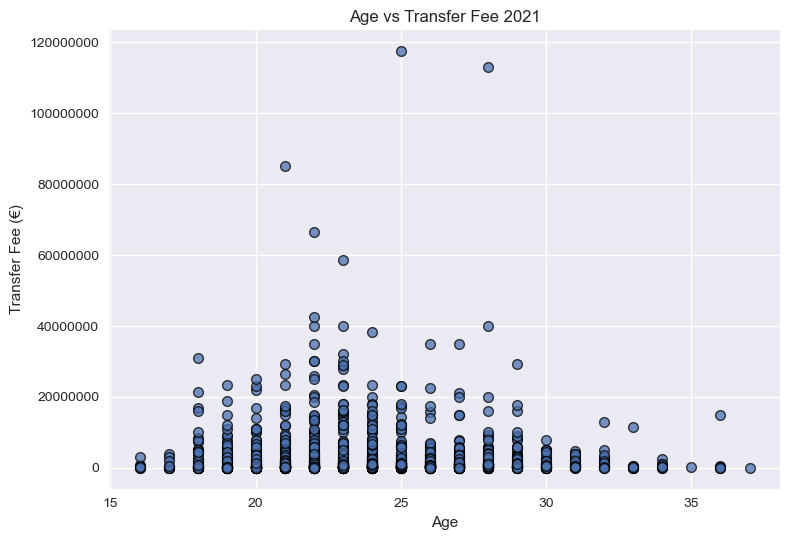

In [217]:
#The correlations between Age and Transfer Fee. Age vs Transfer Fee
## change the font of label and title

Age = df_transfer_players['Age']
TransferFee = df_transfer_players['Transfer Fee (€)'] 

plt.style.use('seaborn')


plt.scatter(Age, TransferFee,edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Age vs Transfer Fee 2021')
plt.ylabel('Transfer Fee (€)')
plt.xlabel('Age')
plt.ticklabel_format(style='plain')

plt.tight_layout()

plt.show()


## Creating a graph Position by Transfer Fee

In [218]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [245]:
df_transfer_players.reset_index(drop=True, inplace=True)

In [246]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
0,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
1,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
2,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
3,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
4,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
1659,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
1660,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
1661,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12
1662,Left Winger,27,Houston,United States,MLS,Miami,United States,MLS,91000,2021-12-16,12


In [312]:
results =  df_transfer_players.groupby('Position').sum()
results

,Age,Transfer Fee (€),Month
Position,,,
Attacking Midfield,3275,313097999,766
Central Midfield,4346,556894998,1115
Centre-Back,6403,886407000,1527
Centre-Forward,8035,963901999,1887
Defensive Midfield,2944,306312999,644
Goalkeeper,2087,189449000,497
Left Midfield,415,57972000,97
Left Winger,3685,667978000,913
Left-Back,2694,219149000,698


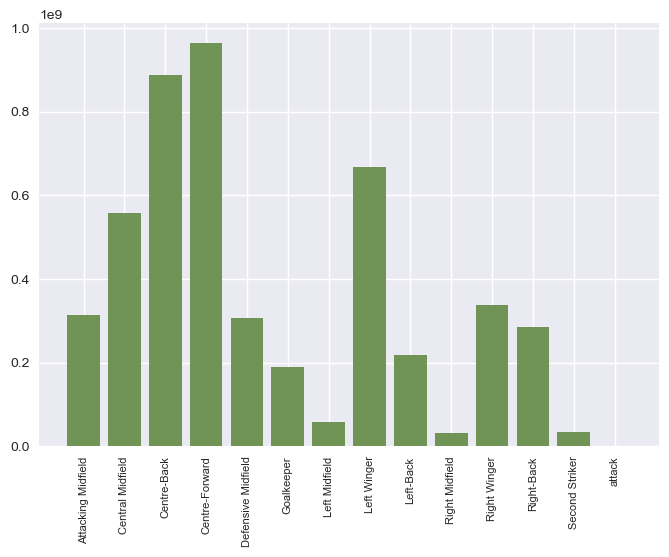

In [316]:
# remove scientific notation, write good labels and title and modify these

Position = [position for position, df in df_transfer_players.groupby('Position')]

plt.bar(Position, results['Transfer Fee (€)'], color='#6f9456')
plt.xticks(Position, rotation = 'vertical', size=8)

plt.show()

In [298]:
a = df_transfer_players.groupby('Transfer Fee (€)').sum()
a

,Age,Month
Transfer Fee (€),,
1000,51,8
2000,19,10
5000,69,18
8000,17,2
9000,20,7
...,...,...
58500000,23,7
66500000,22,7
85000000,21,7


In [153]:
df_loan_players = df.loc[df['Transfer Fee (€)'] == 0]

In [724]:
#browse my notes if I do all steps which should be done!
#Group league and country (how much money league earn and spend in terms of clubs) which club earns most and which spends 
#and how much money they earn visualise it bar chart
#top 10 players and graph these
# group players in therms of age and gorup these by position and which posion costs most. COREY SCHAFER!@
# collearation between age and fee and perhaps league and country(the highest one which earn and spend?? and 
# apply conditional categories if = 0 then it is a loan. 
# filter recorda basedon age young and the same with salary make these groups, ;
#show from which position they are oldest and youngest ones 
# which league ears most
# make a graph with transfer fee and months by position (legend) x = month y transfer fee
## https://sites.duke.edu/transfermarket/data/premier-league/ <-- take inspirations
# total spendings
## total spending per club from the best clubs on the world
## google -> age transfer fee (inspirations)
#take inspriation from
#https://www.researchgate.net/publication/342347848_Analyzing_soccer's_transfers_and_predicting_footballers'_transfer_price
#look for more inspiration regarding this thema  from internet